In [1]:
import nflfastpy as npy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
import urllib
from PIL import Image

### Load team color and logo data

In [2]:
df_logos = npy.load_team_logo_data()

### Load 2021 play-by-play data

In [3]:
df = npy.load_pbp_data(2021)

### Filter to penalties that occured on 3rd down or 4th down

In [33]:
df_penalty = df[(df["down"].isin([3, 4])) & (df["penalty"] == 1)].copy()

In [34]:
df_penalty[[
    "posteam", 
    "defteam", 
    "down", 
    "ydstogo", 
    "penalty", 
    "penalty_team", 
    "penalty_type", 
    "penalty_yards", 
    "yards_gained", 
    "first_down"
]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0
176,ARI,TEN,4.0,7,1.0,TEN,Offensive Holding,2.0,0.0,0.0
229,LV,BAL,3.0,4,1.0,LV,False Start,6.0,0.0,0.0
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
36938,HOU,SEA,4.0,10,1.0,HOU,False Start,5.0,0.0,0.0
36992,SEA,HOU,4.0,13,1.0,SEA,Delay of Game,5.0,0.0,0.0
37024,SF,CIN,3.0,4,1.0,SF,Offensive Holding,10.0,0.0,0.0
37037,CIN,SF,3.0,7,1.0,CIN,False Start,5.0,0.0,0.0


### Filter where the offending team was on defense

In [35]:
df_penalty = df_penalty[df_penalty["defteam"] == df_penalty["penalty_team"]].copy()

In [36]:
df_penalty[[
    "posteam", 
    "defteam", 
    "down", 
    "ydstogo", 
    "penalty", 
    "penalty_team", 
    "penalty_type", 
    "penalty_yards", 
    "yards_gained", 
    "first_down"
]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0
176,ARI,TEN,4.0,7,1.0,TEN,Offensive Holding,2.0,0.0,0.0
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0
299,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,32.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
36752,PIT,MIN,3.0,9,1.0,MIN,Neutral Zone Infraction,5.0,0.0,0.0
36757,PIT,MIN,3.0,8,1.0,MIN,Defensive Pass Interference,7.0,0.0,1.0
36865,HOU,SEA,4.0,6,1.0,SEA,Unnecessary Roughness,15.0,0.0,1.0
36934,HOU,SEA,3.0,10,1.0,SEA,Defensive Holding,5.0,0.0,1.0


### Find where the yards gained were less than the yards to go but team got a first down

In [37]:
df_penalty = df_penalty[(df_penalty["yards_gained"] < df_penalty["ydstogo"]) & (df_penalty["first_down"] == 1)].copy()

In [38]:
df_penalty["final_pts"] = df_penalty["fixed_drive_result"].apply(lambda x: 6 if x == "Touchdown" else 3 if x == "Field goal" else 0)
df_penalty["td"] = df_penalty["fixed_drive_result"].apply(lambda x: 1 if x == "Touchdown" else 0)
df_penalty["fg"] = df_penalty["fixed_drive_result"].apply(lambda x: 1 if x == "Field goal" else 0)
df_penalty["total_scores"] = df_penalty["td"] + df_penalty["fg"]

In [39]:
df_penalty[[
    "posteam", 
    "defteam", 
    "down", 
    "ydstogo", 
    "penalty", 
    "penalty_team", 
    "penalty_type", 
    "penalty_yards", 
    "yards_gained", 
    "first_down",
    "fixed_drive_result",
    "final_pts",
    "td",
    "fg",
    "total_scores"
]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down,fixed_drive_result,final_pts,td,fg,total_scores
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0,Touchdown,6,1,0,1
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0,Touchdown,6,1,0,1
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0,Field goal,3,0,1,1
299,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,32.0,0.0,1.0,Turnover on downs,0,0,0,0
958,NYG,DEN,3.0,7,1.0,DEN,Defensive Pass Interference,5.0,0.0,1.0,Touchdown,6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,NYJ,NO,3.0,10,1.0,NO,Defensive Holding,5.0,0.0,1.0,Punt,0,0,0,0
36757,PIT,MIN,3.0,8,1.0,MIN,Defensive Pass Interference,7.0,0.0,1.0,Touchdown,6,1,0,1
36865,HOU,SEA,4.0,6,1.0,SEA,Unnecessary Roughness,15.0,0.0,1.0,Field goal,3,0,1,1
36934,HOU,SEA,3.0,10,1.0,SEA,Defensive Holding,5.0,0.0,1.0,Punt,0,0,0,0


### Remove entries when there were multiple drive-extending penalties on the same drive

In [40]:
df_filter = df_penalty.groupby(["game_id", "fixed_drive"], as_index=False).agg({"game_seconds_remaining": "min"})
df_penalty_deduped = (
    df_penalty.merge(df_filter, how="inner", on=["game_id", "fixed_drive", "game_seconds_remaining"])
)

In [41]:
df_agg_pos = (
    df_penalty_deduped.groupby("posteam", as_index=False)
    .agg({"first_down": "size", "penalty_yards": "sum", "final_pts": "sum", "td": "sum", "fg": "sum", "total_scores": "sum"})
)

df_agg_def = (
    df_penalty_deduped.groupby("defteam", as_index=False)
    .agg({"first_down": "size", "penalty_yards": "sum", "final_pts": "sum", "td": "sum", "fg": "sum", "total_scores": "sum"})
)

In [13]:
# Get all the logos
for i, team in enumerate(df_agg_pos.posteam):
    im = Image.open(urllib.request.urlopen(df_logos[df_logos["team_abbr"] == team].iloc[0].team_logo_espn))
    im.save(f"./logos/{team}.png")

In [44]:
df_temp[df_temp["posteam"] == "PIT"]

,posteam,first_down_pos,penalty_yards_pos,final_pts_pos,td_pos,fg_pos,total_scores_pos,defteam,first_down_def,penalty_yards_def,final_pts_def,td_def,fg_def,total_scores_def,net_pts
0,PIT,12,152.0,60,9,2,11,PIT,1,6.0,3,0,1,1,57


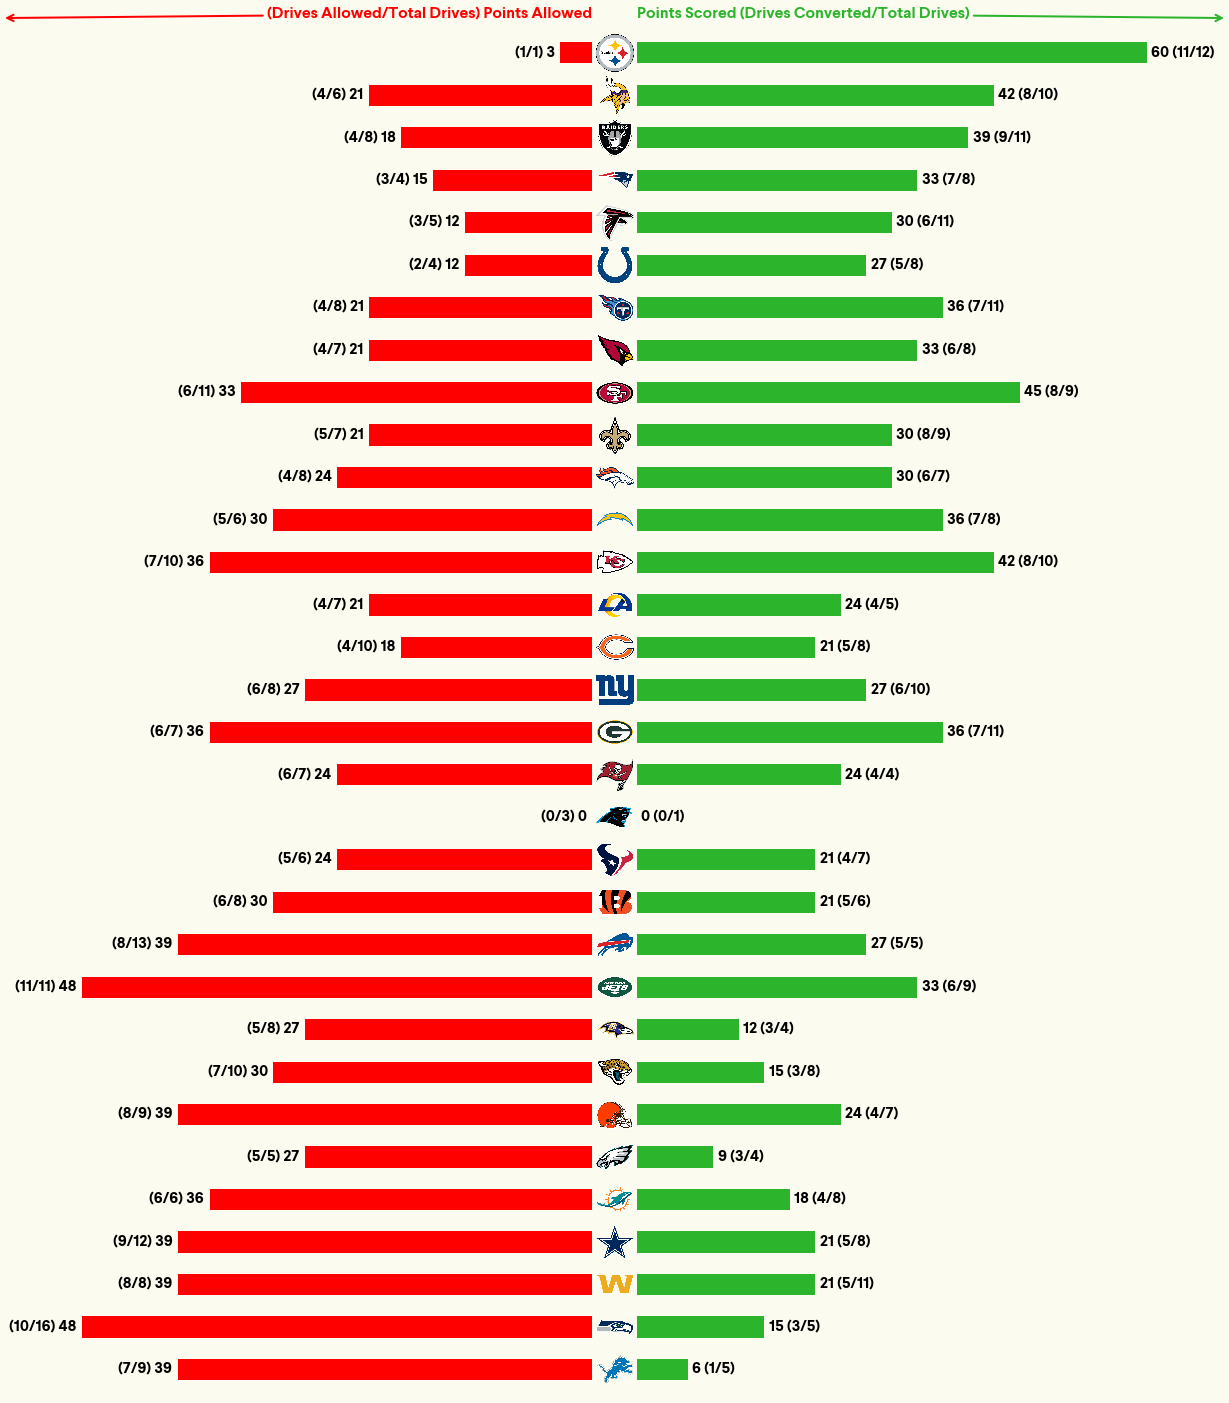

In [51]:
plt.rcParams["font.family"] = "Larsseit"
plt.rcParams["font.size"] = 16

fig = plt.figure(figsize=(20, 25), facecolor="#fbfbf0")
gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[1, 0.07, 1], wspace=0.01)

ax_pos = fig.add_subplot(gs[:, 2], frameon=False)
ax_def = fig.add_subplot(gs[:, 0], frameon=False)
ax_logos = fig.add_subplot(gs[:, 1], frameon=False)

df_temp = (
    df_agg_pos.merge(df_agg_def, left_on="posteam", right_on="defteam", suffixes=("_pos", "_def"))
)
df_temp["net_pts"] = df_temp["final_pts_pos"] - df_temp["final_pts_def"]
df_temp = df_temp.sort_values("net_pts", ascending=False).reset_index(drop=True)

ax_pos.barh(range(df_temp.shape[0]), df_temp["final_pts_pos"], height=0.5, color="#2cb42c")
ax_pos.set(xticks=[], yticks=[], ylim=[-0.5, 31.5])
ax_pos.invert_yaxis()

ax_def.barh(range(df_temp.shape[0]), df_temp["final_pts_def"], height=0.5, color="#ff0000")
ax_def.set(xticks=[], yticks=[], ylim=[-0.5, 31.5])
ax_def.invert_xaxis()
ax_def.invert_yaxis()

ax_logos.set(xticks=[], yticks=[], xlim=[0, 1], ylim=[-0.5, 31.5])
ax_logos.invert_yaxis()
for i, team in enumerate(df_temp.posteam):
    # Points Scored
    info_string = f"{df_temp.iloc[i].final_pts_pos} ({df_temp.iloc[i].total_scores_pos}/{df_temp.iloc[i].first_down_pos})"
    ax_pos.text(df_temp.iloc[i].final_pts_pos + 0.5, i, info_string, ha="left", va="center", fontweight=600)
    
    # Points Allowed
    info_string = f"({df_temp.iloc[i].total_scores_def}/{df_temp.iloc[i].first_down_def}) {df_temp.iloc[i].final_pts_def}"
    ax_def.text(df_temp.iloc[i].final_pts_def + 0.5, i, info_string, ha="right", va="center", fontweight=600)
    
    # Logos
    im = np.array(Image.open(f"./logos/{team}.png"))
    xy = [0.5, i]
    imbox = OffsetImage(im, zoom=0.08)
    imbox.image.axes = ax_logos
    
    ab = AnnotationBbox(
        imbox, xy,
        frameon=False
    )
    
    ax_logos.add_artist(ab)
    
# Add Annotations
ax_pos.annotate(
    "Points Scored (Drives Converted/Total Drives)",
    xy=(1.1, 1.01),
    xytext=(0, 1.01),
    xycoords="axes fraction",
    textcoords="axes fraction",
    fontweight=600,
    color="#2cb42c",
    arrowprops=dict(arrowstyle="->", linewidth=2, color="#2cb42c")
)

ax_def.annotate(
    "(Drives Allowed/Total Drives) Points Allowed",
    xy=(-0.1, 1.01),
    xytext=(1, 1.01),
    xycoords="axes fraction",
    textcoords="axes fraction",
    ha="right",
    fontweight=600,
    color="#ff0000",
    arrowprops=dict(arrowstyle="->", linewidth=2, color="#ff0000")
)

#plt.savefig("test_deduped.png", dpi=300, bbox_inches="tight")
plt.show()

In [114]:
# Do a rough grouping of every penalty type
df_pen_type = df_penalty.groupby("penalty_type", as_index=False).size()

In [115]:
df_pen_type

,penalty_type,size
0,Defensive Holding,48
1,Defensive Offside,12
2,Defensive Pass Interference,106
3,Defensive Too Many Men on Field,1
4,Disqualification,1
5,Encroachment,8
6,Face Mask,3
7,Horse Collar Tackle,2
8,Illegal Contact,3
9,Illegal Substitution,1


In [116]:
# Combine defensive offside, neutral zone infraction, and encroachment
df_pen_type.loc[df_pen_type.shape[0]] = [
    "Defensive Offside, Neutral Zone Infraction, Encroachment", 
    df_pen_type.loc[df_pen_type["penalty_type"].isin(["Defensive Offside", "Neutral Zone Infraction", "Encroachment"]), "size"].sum()
]

# Remove the indices for the individual penalties
df_pen_type = df_pen_type.drop(
    df_pen_type[df_pen_type["penalty_type"].isin(["Defensive Offside", "Neutral Zone Infraction", "Encroachment"])].index
).sort_values("size", ascending=False).reset_index(drop=True)

In [117]:
df_pen_type

,penalty_type,size
0,Defensive Pass Interference,106
1,Defensive Holding,48
2,"Defensive Offside, Neutral Zone Infraction, En...",29
3,Roughing the Passer,27
4,Unnecessary Roughness,14
5,Illegal Use of Hands,7
6,Roughing the Kicker,6
7,Leverage,4
8,Taunting,4
9,Face Mask,3


In [118]:
# Calculate percentage of penalties
df_pen_type["percentage"] = df_pen_type["size"] / df_pen_type["size"].sum()

In [119]:
df_pen_type

,penalty_type,size,percentage
0,Defensive Pass Interference,106,0.410853
1,Defensive Holding,48,0.186047
2,"Defensive Offside, Neutral Zone Infraction, En...",29,0.112403
3,Roughing the Passer,27,0.104651
4,Unnecessary Roughness,14,0.054264
5,Illegal Use of Hands,7,0.027132
6,Roughing the Kicker,6,0.023256
7,Leverage,4,0.015504
8,Taunting,4,0.015504
9,Face Mask,3,0.011628


In [120]:
# Combine all penalties <5% into one category called "Other"
df_pen_type["penalty_type_new"] = df_pen_type.apply(lambda row: row["penalty_type"] if row["percentage"] > 0.01 else "Other", axis=1)
df_pen_type = (
    df_pen_type.groupby(["penalty_type_new"], as_index=False)
    .agg({"size": "sum", "percentage": "sum"})
    .sort_values("size", ascending=False)
    .reset_index(drop=True)
)

In [121]:
df_pen_type

,penalty_type_new,size,percentage
0,Defensive Pass Interference,106,0.410853
1,Defensive Holding,48,0.186047
2,"Defensive Offside, Neutral Zone Infraction, En...",29,0.112403
3,Roughing the Passer,27,0.104651
4,Unnecessary Roughness,14,0.054264
5,Illegal Use of Hands,7,0.027132
6,Other,7,0.027132
7,Roughing the Kicker,6,0.023256
8,Leverage,4,0.015504
9,Taunting,4,0.015504


In [18]:
df_penalty[df_penalty["penalty_type"] == "Defensive Too Many Men on Field"].iloc[0].desc

'(3:11) (Shotgun) PENALTY on CLE, Defensive Too Many Men on Field, 5 yards, enforced at BAL 33 - No Play.'

In [33]:
for col in df.columns:
    print(col)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
